In [190]:
from itertools import product
import numpy as np

 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE

  
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
 
import optuna
import shap

import warnings
warnings.filterwarnings("ignore")

plt.rc('figure', figsize = (18,6))
plt.rc('font', family = 'sans-serif')

In [191]:
data = pd.read_csv('diabetes.csv')
data.head()


,git Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   git Pregnancies           768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [193]:
data.isnull().sum()

git Pregnancies             0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [194]:
print(f"dataset's shape: {data.shape}")

dataset's shape: (768, 9)


Data has 100000 observations and 9 features

In [195]:
bins = [18,30, 40, 50, 100]  #Defining age groups
labels = ['18-30', '31-40', '41-50', '51+']  #Labels for the age group bins
data['Age'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
data['Age']

0        51+
1      31-40
2      31-40
3      18-30
4      31-40
       ...  
763      51+
764    18-30
765    31-40
766    41-50
767    18-30
Name: Age, Length: 768, dtype: category
Categories (4, object): ['18-30' < '31-40' < '41-50' < '51+']

In [196]:
data['Outcome'] = data['Outcome'].astype('object')
data.describe()

,git Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000


In [197]:
data[['Age','Outcome']].describe()

,Age,Outcome
count,768,768
unique,4,2
top,18-30,0
freq,396,500


In [198]:
cont_cols = data.select_dtypes('number').columns

In [199]:
cont_cols

Index(['git Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction'],
      dtype='object')

## Univariate Distribution

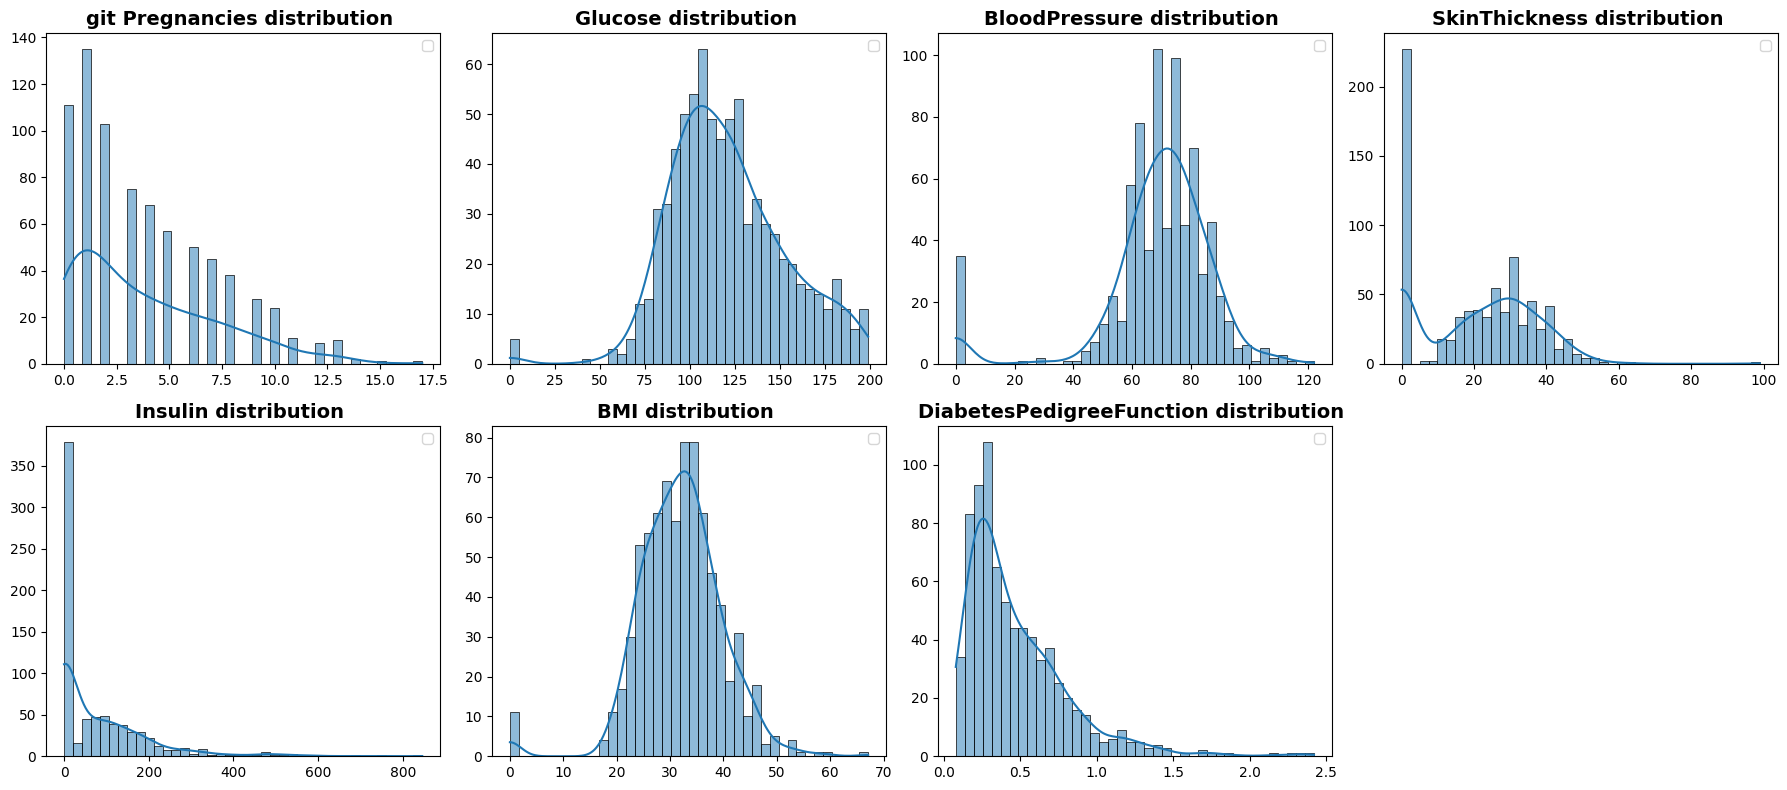

In [200]:
fig, axes = plt.subplots(2,4, figsize=(18, 8))
axes = axes.flatten()
# Plot histograms for each continuous column
# Plot histograms for each continuous column
for i, col_name in enumerate(cont_cols):
    ax = axes[i]
    sns.histplot(data=data, x=col_name, color = '#1f77b4',
                  kde=True, ax=ax,  bins=40)

    # Set title  
    ax.set_title(f'{col_name} distribution ', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily':'sans-serif'})
    ax.legend()
    ax.grid(False)
    ax.set_ylabel(None)
    ax.set_xlabel(None)

# Adjust layout
fig.delaxes(axes.flatten()[-1])
plt.tight_layout()
plt.show()

It seems like data has a lot of outliers. 

In [201]:
data['Age'].value_counts()

Age
18-30    396
31-40    165
41-50    118
51+       89
Name: count, dtype: int64

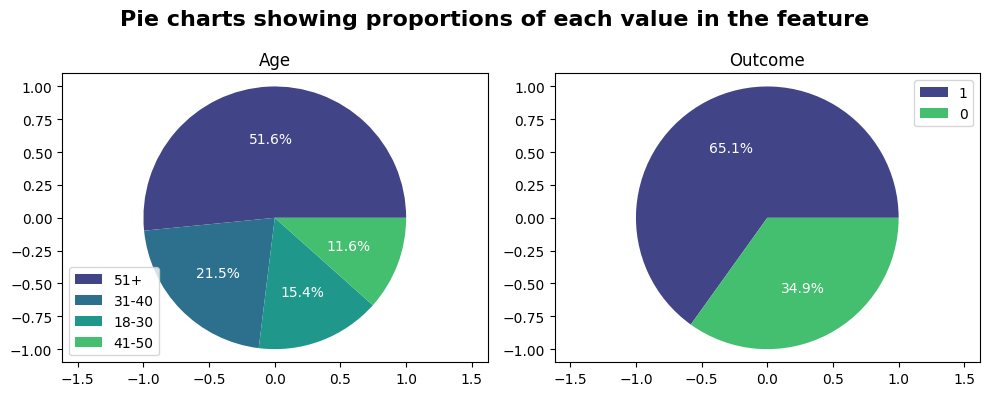

In [202]:
fig, axes= plt.subplots(nrows=1,ncols=2, figsize=(10,4))
axes= axes.flatten()
for i, col_name in enumerate(['Age','Outcome']):
      ax = axes[i]
      colors = plt.get_cmap()(np.linspace( 0.2,0.7,len(data[col_name].unique())))
      ax.pie(data[col_name].value_counts(), 
             autopct='%1.1f%%', 
             colors = colors, 
             frame=True, 
             textprops={'color': "white"})
      ax.set_title(f'{col_name}')
      ax.grid(False)
      ax.axis('equal')
      ax.legend(data[col_name].unique(), loc='best')
fig.suptitle('Pie charts showing proportions of each value in the feature', 
             fontsize=16, 
             fontweight='bold')
plt.tight_layout()
plt.show()

## Handling Outliers


In [203]:

def remove_outliers(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1 
  upper_boundary = q3 + 1.5*iqr 
  lower_boundary = q3 - 1.5*iqr
  new_df = df.loc[(df[col]>lower_boundary)&(df[col]<upper_boundary)]
  return new_df

In [ ]:
for col in cont_cols:
  data = remove_outliers(data, col)

Bivariate Distributions.

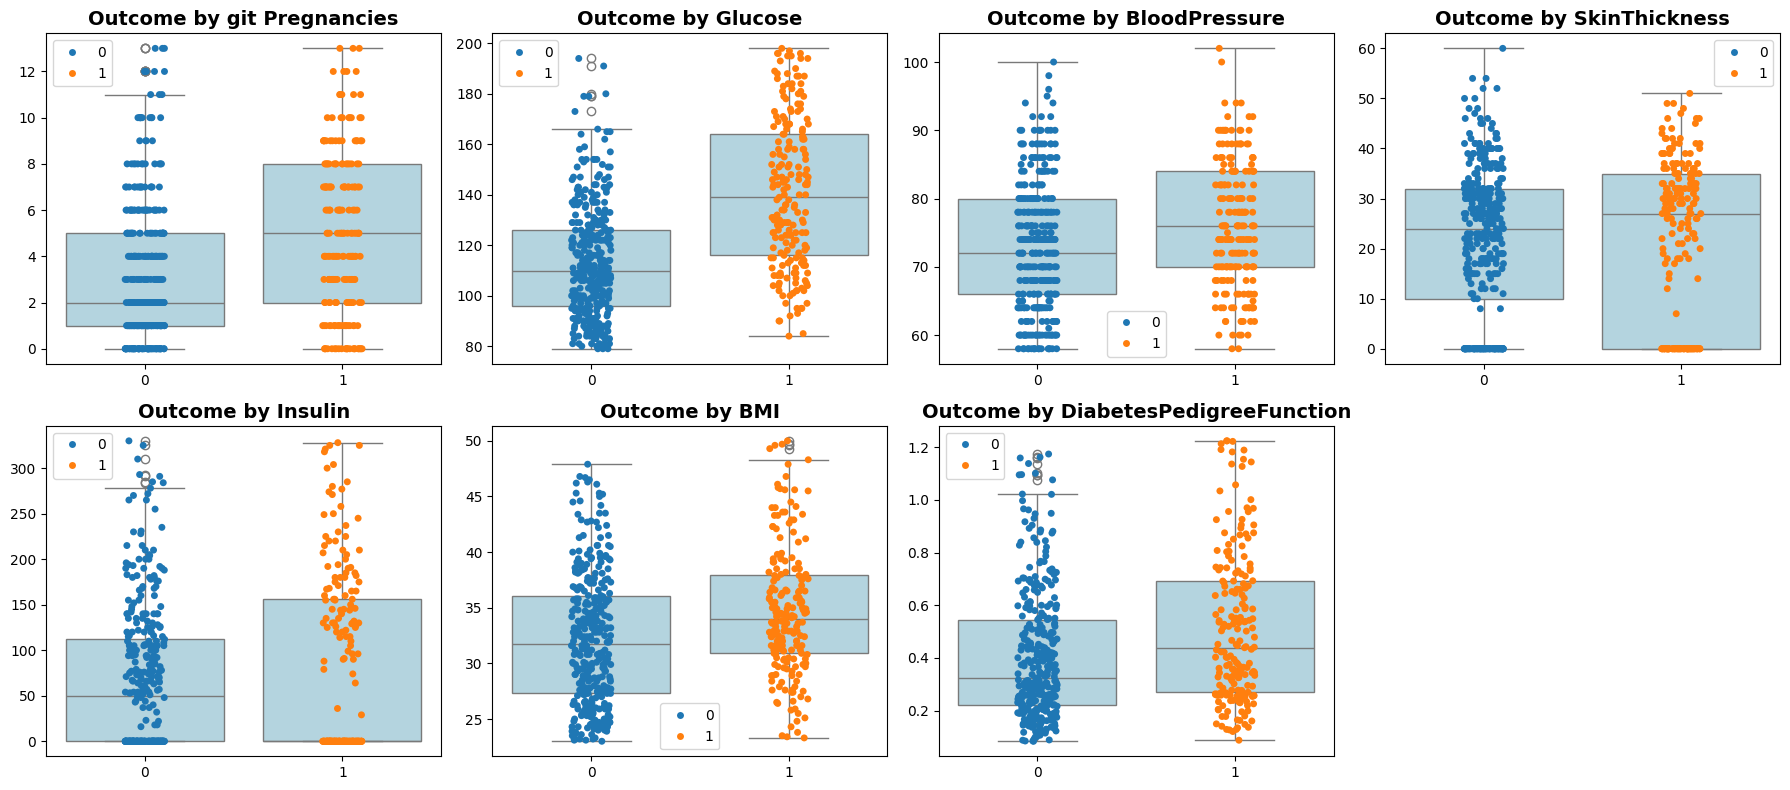

In [205]:
fig, axes = plt.subplots(2,4, figsize=(18, 8))
axes = axes.flatten()
# Plot histograms for each continuous column
# Plot histograms for each continuous column
for i, col_name in enumerate(cont_cols):
    ax = axes[i]
    sns.stripplot(data=data, hue='Outcome', y=col_name, x ='Outcome', ax=ax)
    sns.boxplot(data=data, y=col_name,color = 'lightblue', x ='Outcome', ax=ax)

    # Set title  
    ax.set_title(f'Outcome by {col_name}', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily':'sans-serif'})
    ax.legend()
    ax.grid(False)
    ax.set_ylabel(None)
    ax.set_xlabel(None)

# Adjust layout
fig.delaxes(axes.flatten()[-1])
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Countplot by Age')

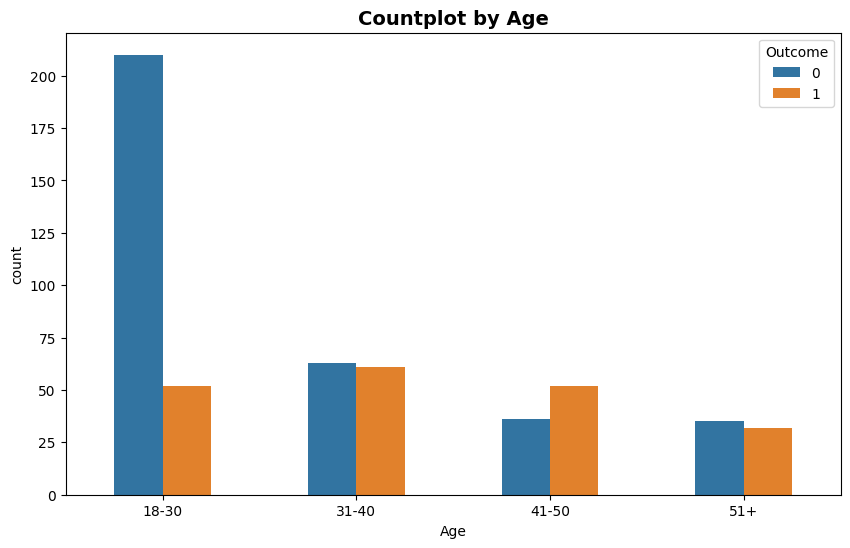

In [206]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,width=0.5, x = 'Age', hue = 'Outcome')
plt.title(f'Countplot by Age',fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily':'sans-serif'})

In [207]:
data['Outcome'].value_counts()

Outcome
0    344
1    197
Name: count, dtype: int64

The data is pretty imbalanced. 
Imbalanced data means that one class (e.g., fraud cases, rare diseases) significantly outnumbers another. This causes issues such as:
- Biased Predictions – The model favors the majority class, often ignoring the minority class.
- Poor Generalization – The model struggles to learn patterns for the minority class.
- Misleading Accuracy – High accuracy doesn’t mean good performance (e.g., 95% accuracy if 95% of cases belong to one class, but missing all minority cases).

*I will use SMOTE from imbalance libary to do this. For this dataset, I will use oversampling the minority class

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   git Pregnancies           541 non-null    int64   
 1   Glucose                   541 non-null    int64   
 2   BloodPressure             541 non-null    int64   
 3   SkinThickness             541 non-null    int64   
 4   Insulin                   541 non-null    int64   
 5   BMI                       541 non-null    float64 
 6   DiabetesPedigreeFunction  541 non-null    float64 
 7   Age                       541 non-null    category
 8   Outcome                   541 non-null    object  
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 38.8+ KB


In [209]:

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the target variable 'Outcome' into numeric labels (e.g., 0 and 1)
y = le.fit_transform(data['Outcome'])

#Encoding 'Age' 
data['Age'] = le.fit_transform(data['Age'])  
# Define feature variables (X) by dropping the target column 'Outcome'
X = data.drop(columns=['Outcome'])

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training dataset by oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [214]:
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

def objective_svm(trial):
    C = trial.suggest_float('C', 1e-3, 1e3, log=True)
    gamma = trial.suggest_float('gamma', 1e-3, 1e3, log=True)
    model = SVC(C=C, gamma=gamma, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

def objective_lr(trial):
    C = trial.suggest_float('C', 1e-3, 1e3, log=True)
    model = LogisticRegression(C=C, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 1.0, log=True)
    model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50)

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=50)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)


best_rf = RandomForestClassifier(**study_rf.best_params, random_state=42)
best_svm = SVC(**study_svm.best_params, random_state=42)
best_lr = LogisticRegression(**study_lr.best_params, random_state=42)
best_xgb = XGBClassifier(**study_xgb.best_params, random_state=42)

models = {
    'Random Forest': best_rf,
    'SVM': best_svm,
    'Logistic Regression': best_lr,
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
    }

[I 2025-02-23 23:53:08,496] A new study created in memory with name: no-name-a3dd95d0-372a-498f-97d6-adb1e543053a
[I 2025-02-23 23:53:08,632] Trial 0 finished with value: 0.7177914110429447 and parameters: {'n_estimators': 138, 'max_depth': 2}. Best is trial 0 with value: 0.7177914110429447.
[I 2025-02-23 23:53:08,681] Trial 1 finished with value: 0.7055214723926381 and parameters: {'n_estimators': 46, 'max_depth': 2}. Best is trial 0 with value: 0.7177914110429447.
[I 2025-02-23 23:53:08,729] Trial 2 finished with value: 0.6993865030674846 and parameters: {'n_estimators': 36, 'max_depth': 10}. Best is trial 0 with value: 0.7177914110429447.
[I 2025-02-23 23:53:08,853] Trial 3 finished with value: 0.7177914110429447 and parameters: {'n_estimators': 149, 'max_depth': 2}. Best is trial 0 with value: 0.7177914110429447.
[I 2025-02-23 23:53:09,013] Trial 4 finished with value: 0.7177914110429447 and parameters: {'n_estimators': 157, 'max_depth': 4}. Best is trial 0 with value: 0.7177914110

In [217]:
# Print results
for name, metrics in results.items():
    print(f"\n{name} Performance Metrics:")
    for metric, value in metrics.items():
        if metric == "Classification Report":
            print(f"\n{name} Classification Report:\n{classification_report(y_test, models[name].predict(X_test))}")
        else:
            print(f"{metric}: {value:.4f}")


Random Forest Performance Metrics:
Accuracy: 0.7362
Precision: 0.7317
Recall: 0.7362
F1 Score: 0.7225

SVM Performance Metrics:
Accuracy: 0.7117
Precision: 0.7031
Recall: 0.7117
F1 Score: 0.7008

Logistic Regression Performance Metrics:
Accuracy: 0.7423
Precision: 0.7414
Recall: 0.7423
F1 Score: 0.7258
